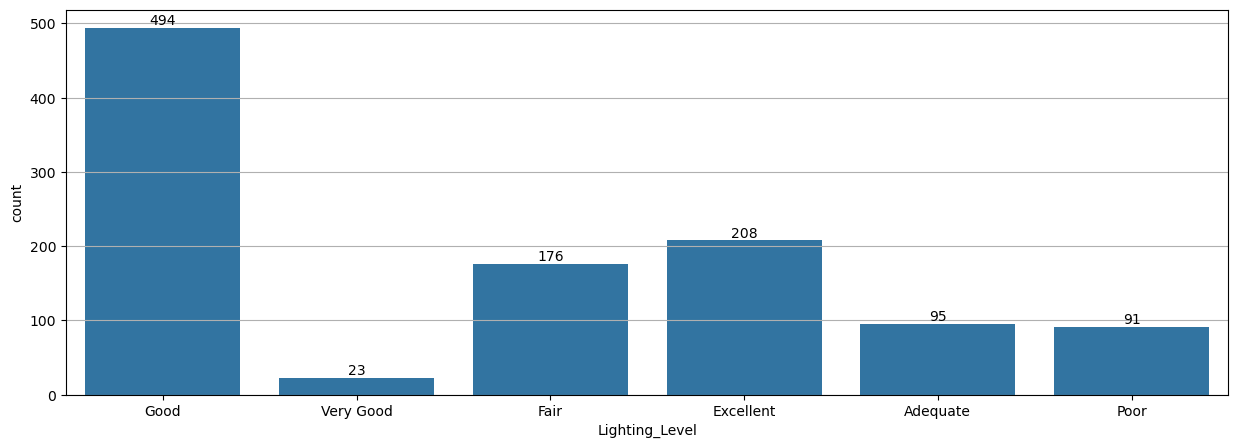

Accuracy: 0.9166666666666666


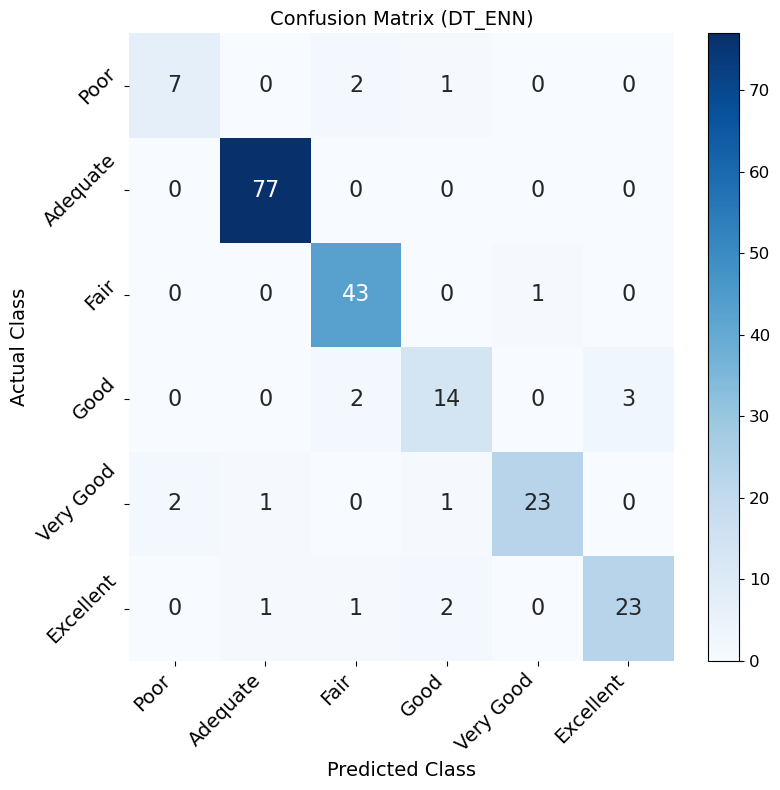

In [3]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix

# Read the CSV file into a DataFrame
df = pd.read_csv("IUBAT_Testing7.csv")

# Visualize the distribution of 'PMV_Level' column
plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='Lighting_Level')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Preprocess categorical variables
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Define class names
class_names = ['Excellent', 'Very Good', 'Good', 'Fair', 'Adequate', 'Poor',]

# Separate input features and target variable
inputs = df.drop(['Lighting_Level'], axis=1)
target = df['Lighting_Level']

# Balance the dataset using SMOTEENN
resample = SMOTEENN(random_state=0)
X, y = resample.fit_resample(inputs, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Create and train the Random Forest Classifier model
rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names[::-1], yticklabels=class_names[::-1], annot_kws={"fontsize": 14})

# Increase font size for annotations
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14, rotation=45)  # Rotate y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14, rotation=45, ha='right')  # Rotate x-axis labels and align them to the right

plt.title('Confusion Matrix (DT_ENN)', fontsize=14)  # Increase title font size
plt.xlabel('Predicted Class', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual Class', fontsize=14)  # Increase y-axis label font size

# Increase font size for the values inside each class
for text in heatmap.texts:
    text.set_fontsize(16)

# Remove the duplicate colorbar
plt.gcf().get_axes()[1].remove()

# Create a separate colorbar figure and adjust its position
cbar = plt.colorbar(heatmap.collections[0])
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size

plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import classification_report

# ...

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in text form
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9166666666666666
Confusion Matrix:
[[ 7  0  2  1  0  0]
 [ 0 77  0  0  0  0]
 [ 0  0 43  0  1  0]
 [ 0  0  2 14  0  3]
 [ 2  1  0  1 23  0]
 [ 0  1  1  2  0 23]]
Classification Report:
              precision    recall  f1-score   support

   Excellent       0.78      0.70      0.74        10
   Very Good       0.97      1.00      0.99        77
        Good       0.90      0.98      0.93        44
        Fair       0.78      0.74      0.76        19
    Adequate       0.96      0.85      0.90        27
        Poor       0.88      0.85      0.87        27

    accuracy                           0.92       204
   macro avg       0.88      0.85      0.86       204
weighted avg       0.92      0.92      0.92       204

